In [166]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from scipy import linalg

In [112]:
def mean (data):
    data = np.array(data)
    return np.sum(data) / data.size

def standard_deviation (data):
    m = mean(data)
    square_dist = 0
    data = np.array(data).flatten()
    for i in range (len(data)) : 
        square_dist += (data[i] - m)**2
    return np.sqrt( square_dist / (data.size - 1))

def matrix_standardization( data ):
    m = mean(data)
    sd = standard_deviation(data)
    return (data-m)/sd

400


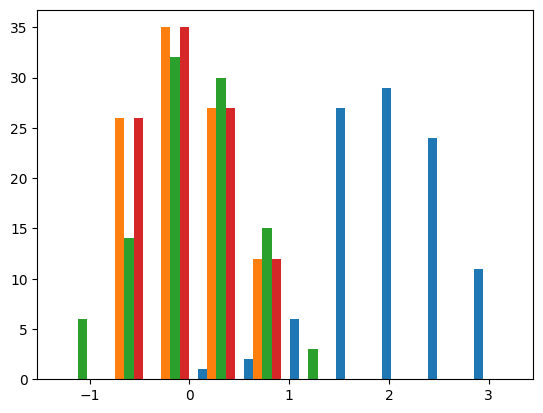

In [116]:
X = np.random.rand(100, 4)

print(X.size)

plt.hist(fft(X).real)
plt.show()

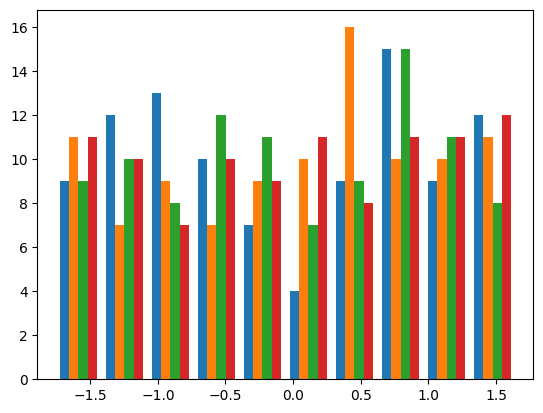

In [115]:
X_trans = matrix_standardization(X)

plt.hist(X_trans)
plt.show()

## Task B: Pairwise Distances in the Plane

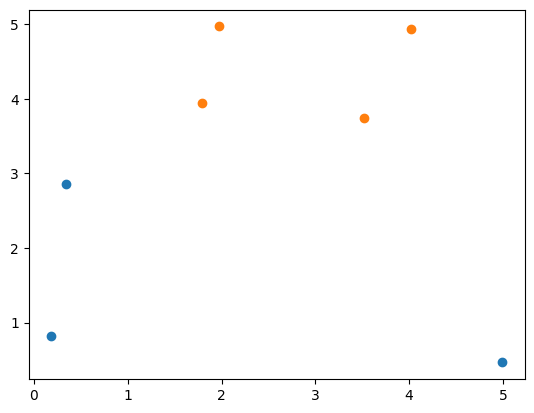

In [163]:
P = np.random.rand(3, 2)*5
Q = np.random.rand(4, 2)*5

plt.scatter(P[:, 0], P[:,1])
plt.scatter(Q[:, 0], Q[:,1])
plt.show()

In [164]:
# Calculate distances
def calculate_distances( M1, M2 ):
    D = np.zeros((M1.shape[0], M2.shape[0]))
    for i in range (D.shape[0]):
        for j in range(D.shape[1]):
            D[i][j] = np.sqrt((M1[i][0]-M2[j][0])**2 + (M1[i][1]-M2[j][1])**2)
    return D

calculate_distances(P, Q)

array([[5.41912412, 4.57181959, 4.71932407, 3.59115041],
       [4.52147445, 5.62765048, 3.51123493, 4.43290745],
       [2.66877798, 4.22270468, 1.80827023, 3.2923774 ]])

## Task C

In [173]:
def posteriori(x_n, mu, epsilon, d):
    diff = x_n - mu
    exponent = -0.5 * diff.T @ np.linalg.inv(epsilon) @ diff
    denominator = ((2 * np.pi) ** (d / 2)) * (np.linalg.det(epsilon) ** 0.5)
    return np.exp(exponent) / denominator

In [174]:
def maximum_likelihood(x_n, d, mu_1, epsilon_1, mu_2, epsilon_2):
    if posteriori(x_n, mu_1, epsilon_1, d) > posteriori(x_n, mu_2, epsilon_2, d):
        return 1
    return 2

In [ ]:
# Test cases
x_n = np.array([[1], [2]])
d = 2
mu_1 = np.array([[0], [0]])
epsilon_1 = np.array([[1, 0], [0, 1]])
mu_2 = np.array([[3], [3]])
epsilon_2 = np.array([[1, 0], [0, 1]])
print(maximum_likelihood(x_n, d, mu_1, epsilon_1, mu_2, epsilon_2))

2
